<a href="https://colab.research.google.com/github/UmeshGayashan/Emotion_Detection_Model/blob/master/Human_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *FACE EXPRESSION RECOGNITION*

### *Group Members* :
   
*   EG/2020/3912 - Dissanayake D.M.S.C
*   EG/2020/3905 - Dissanayake D.M.M.I.T
*   EG/2020/4095 - Nethsara R.A.A
*   EG/2020/4112 - Perera H.L.U.G

### *Data Set*

Our first step was finding a dataset suitable for training our deep learning model. We sourced a dataset containing 7 of images capturing various facial expressions representing emotions such as,

    1.   Anger
    2.   Disgust
    3.   Fear
    4.   Happiness
    5.   Neutrality
    6.   Sadness
    7.   Surprise

This dataset forms the foundation upon which our model learns to recognize and classify emotions.

### *Preprocessing and Data Augmentation*

With our dataset in hand, we employed advanced preprocessing techniques. This involved tasks such as resizing images to a standard format of 48x48 pixels, converting images to grayscale to simplify processing, and normalizing pixel values to enhance model performance. Data augmentation played a crucial role here, allowing us to artificially increase the diversity of our dataset by applying random rotations, flips, and zooms to the images. This step not only improved model generalization but also ensured robustness against variations in facial expressions and environmental conditions.

### *Model Architecture*



*   *Convolutional Neural Network (CNN)*: Chosen for its effectiveness in image recognition.
*   Layers :
  *   *Convolution*: Extracts features from images.
  *   *Batch Normalization*: Normalizes inputs of the previous layer.
  *   *Activation Functions*: Introduce non-linearity (e.g., ReLU).
  *   *Max Pooling*: Reduces spatial dimensions of the feature maps.
  *   *Dropout Regularization*: Prevents overfitting by randomly dropping neurons during training.
  *   *Hierarchical Feature Learning*: Enables the model to learn facial features at different levels of abstraction, crucial for accurate emotion classification.

### *Training and Optimization*
Training the model involved optimizing parameters and hyperparameters to achieve high accuracy in emotion classification. We employed the Adam optimizer for efficient gradient descent and utilized categorical cross-entropy loss to measure the discrepancy between predicted and actual emotions. The model underwent rigorous training on a GPU-accelerated platform, allowing us to expedite computation and iterate quickly on model improvements.

### *Evaluation and Validation*
Following training, our model underwent comprehensive evaluation and validation. We partitioned our dataset into training and validation sets, using the latter to assess model performance on unseen data. Metrics such as accuracy, loss, and confusion matrices provided insights into the model's ability to correctly classify emotions across different facial expressions.

### *Conclusion*
In conclusion, our Emotion Detection Deep Learning Project shows how computers can learn to understand human emotions through facial expressions. It’s exciting because it could help computers interact with people better in the future, like understanding if someone is happy or sad.

In [1]:
! pip install kaggle

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

Set up the Kaggle API

In [4]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mayankanand2701/samsung-stock-price-dataset                     Samsung Stock Price Dataset 📱🏭📈                  114KB  2024-06-13 14:51:11           1255         30  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                 496KB  2024-06-15 18:50:51           2725         69  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          11034        196  1.0              
rabieelkharoua/students-performance-dataset                     📚 Students 

In [7]:
! kaggle datasets download 'jonathanoheix/face-expression-recognition-dataset'

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 97% 117M/121M [00:03<00:00, 41.1MB/s]
100% 121M/121M [00:03<00:00, 35.3MB/s]


In [8]:
! unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

Import Libraries

In [9]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import load_img, img_to_array

In [10]:
folder_path = "images/"

In [11]:
# Define image dimensions and batch size
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32

In [12]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images/train",
    seed=123,
    shuffle=True,
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 28821 files belonging to 7 classes.


In [13]:
class_names = train_dataset.class_names
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [14]:
# Get the number of classes (unique target labels)
num_classes = len(set(train_dataset.class_names))

# Print the number of classes
print("Number of classes:", num_classes)

Number of classes: 7


In [15]:
from collections import Counter
# Initialize a counter to count images in each class
class_counts = Counter()

# Iterate over the dataset and update the counter
for images, labels in train_dataset:
    class_counts.update(labels.numpy())

# Map the class counts to the class names
class_names = train_dataset.class_names
class_counts = {class_names[i]: class_counts[i] for i in range(len(class_names))}

# Print the number of images in each class
print("Number of images in each class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Number of images in each class:
angry: 3993
disgust: 436
fear: 4103
happy: 7164
neutral: 4982
sad: 4938
surprise: 3205


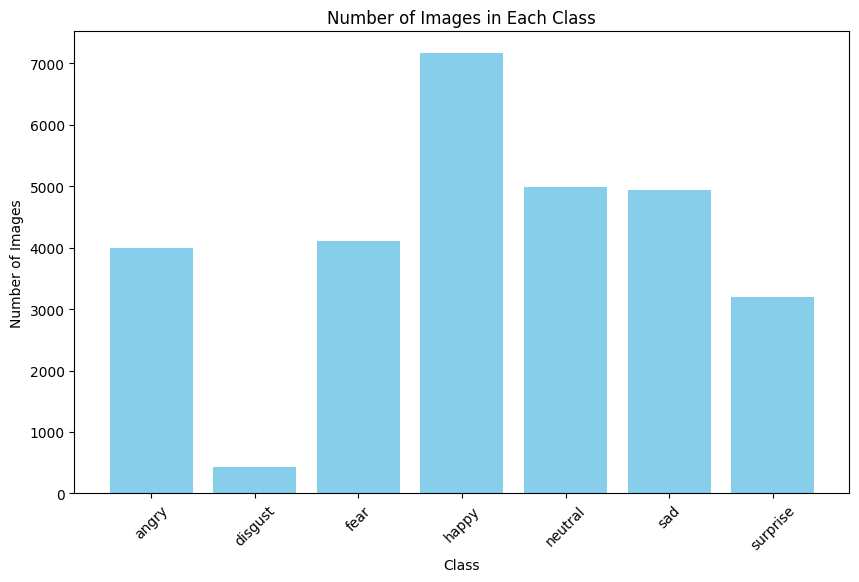

In [16]:
# Plot the class distribution as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45)
plt.show()

Visualized sample images from the dataset

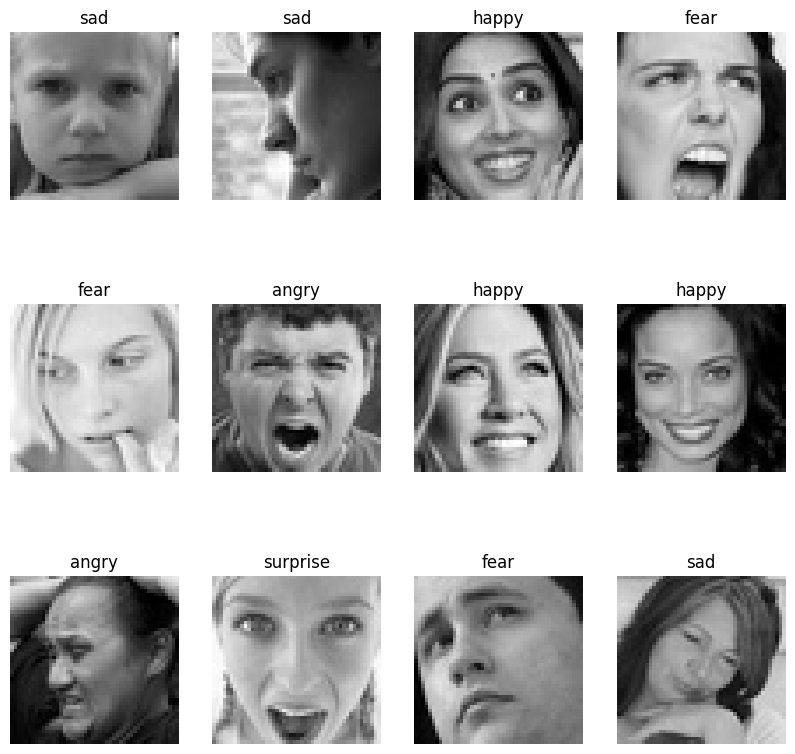

In [17]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

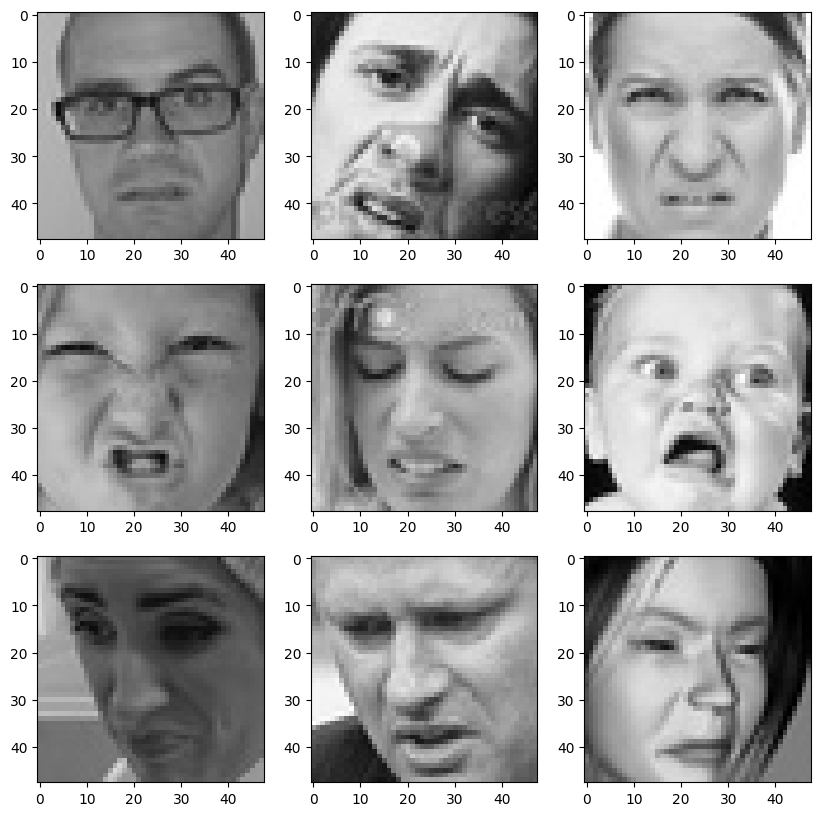

In [18]:
expression = 'disgust'

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(IMG_HEIGHT, IMG_WIDTH))
    plt.imshow(img)
plt.show()

In [19]:
train_data_dir=folder_path+"train/"
validation_data_dir=folder_path+"validation/"

Image Preprocessing

Data Augmentation

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize the pixel values to the range [0, 1]
    rotation_range=30, # Randomly rotate the images by up to 30 degrees
    shear_range=0.3, # Shear the image by up to 30%
    zoom_range=0.3, # Zoom in on the image by up to 30%
    horizontal_flip=True, # Randomly flip the images horizontally
    fill_mode='nearest' # Fill in any missing pixels after a transformation with the nearest pixel value
)

In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255) # Normalize the pixel values to the range [0, 1]

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir, # Directory containing the training data
    color_mode='grayscale', # Convert images to grayscale
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize images to the specified height and width
    batch_size=BATCH_SIZE, # Number of images to return in each batch
    class_mode='categorical', # Return one-hot encoded labels
    shuffle=True # Shuffle the order of the images
)

Found 28821 images belonging to 7 classes.


In [23]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir, # Directory containing the validation data
    color_mode='grayscale', # Convert images to grayscale
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize images to the specified height and width
    batch_size=BATCH_SIZE, # Number of images to return in each batch
    class_mode='categorical', # Return one-hot encoded labels
    shuffle=True # Shuffle the order of the images
)

Found 7066 images belonging to 7 classes.


In [24]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [25]:
img, label = train_generator.__next__() # img: (32, 48, 48, 1) label: (32, 7)

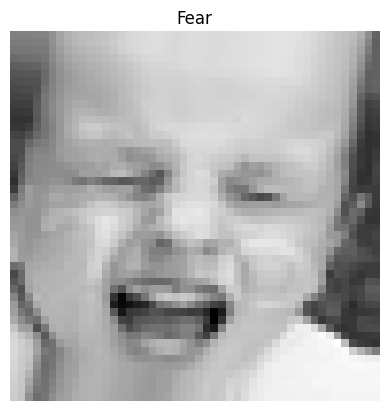

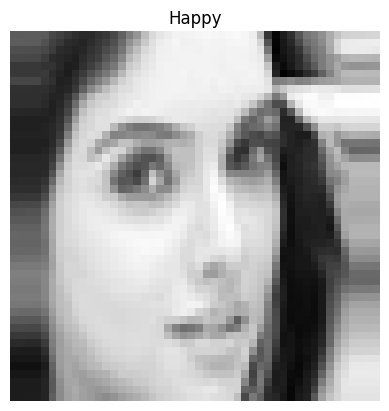

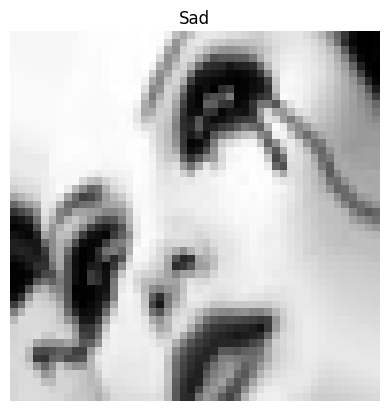

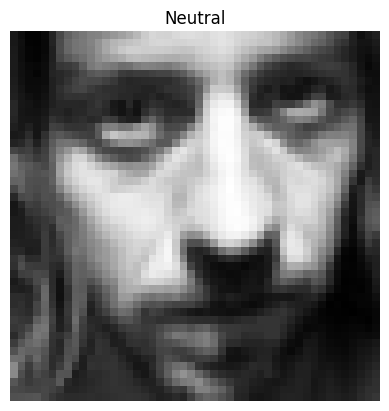

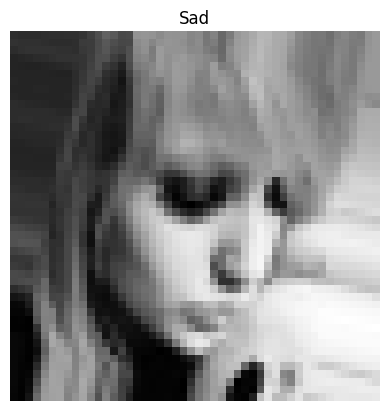

In [26]:
# Plotting the first few images and their labels from the batch
for i in range(5):
    plt.imshow(img[i].reshape(48, 48), cmap='gray')
    plt.title(class_labels[np.argmax(label[i])])
    plt.axis('off')
    plt.show()

In [27]:
train_path = folder_path+"train/"
test_path = folder_path+"validation/"

In [28]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [29]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

Model Architecture

In [30]:
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential() # type of model that allows us to build the model layer by layer

#1st CNN layer

# 64=>The number of filters (3, 3)=>The size of the filters  padding = 'same'=>output size=input size.
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1))) # 1 color channel (grayscale)
model.add(BatchNormalization()) # normalizes the inputs
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # To decrease dimentions
model.add(Dropout(0.25)) # To prevent overfitting (Dropout Regularization)

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())  # multi-dimensional input into a 1D vector

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate=  0.0001)  # Adaptive Moment Estimation (Stochastic Gradient Descent with Momentum)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [31]:
epochs=50

history = model.fit(train_generator,
                    steps_per_epoch=num_train_imgs // BATCH_SIZE,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_test_imgs // BATCH_SIZE,
                    )

Epoch 1/50
900/900 [==============================] - 42s 35ms/step - loss: 2.0240 - accuracy: 0.2153 - val_loss: 1.7892 - val_accuracy: 0.2858
Epoch 2/50
900/900 [==============================] - 31s 35ms/step - loss: 1.8792 - accuracy: 0.2509 - val_loss: 1.7260 - val_accuracy: 0.3061
Epoch 3/50
900/900 [==============================] - 34s 37ms/step - loss: 1.8143 - accuracy: 0.2789 - val_loss: 1.7326 - val_accuracy: 0.3320
Epoch 4/50
900/900 [==============================] - 33s 37ms/step - loss: 1.7451 - accuracy: 0.3129 - val_loss: 1.6224 - val_accuracy: 0.3675
Epoch 5/50
900/900 [==============================] - 34s 38ms/step - loss: 1.6869 - accuracy: 0.3387 - val_loss: 1.5373 - val_accuracy: 0.4118
Epoch 6/50
900/900 [==============================] - 31s 35ms/step - loss: 1.6325 - accuracy: 0.3584 - val_loss: 1.5127 - val_accuracy: 0.4217
Epoch 7/50
900/900 [==============================] - 32s 35ms/step - loss: 1.5819 - accuracy: 0.3811 - val_loss: 1.4708 - val_accuracy:

In [32]:
model.save('Human_Emotion_Recog_Model_50epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


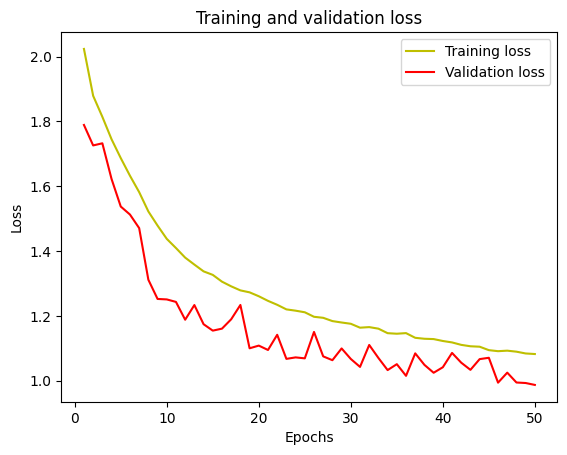

In [33]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

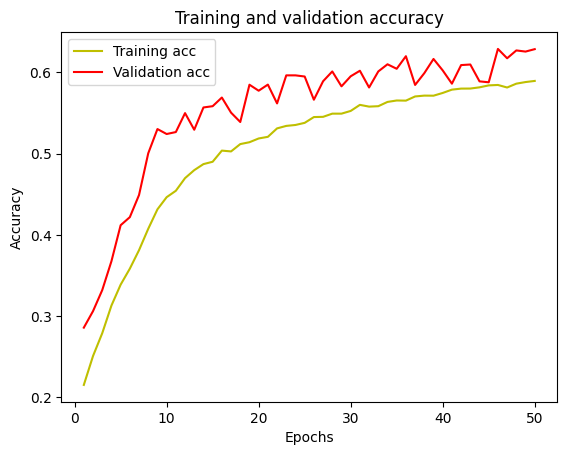

In [35]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
from keras.models import load_model

In [37]:
#Test the model
my_model = load_model('Human_Emotion_Recog_Model_50epochs.h5', compile=False)

In [38]:
#Generate a batch of images (32 images from the validation dataset)
test_img, test_lbl = validation_generator.__next__() #test imag :(32,48,48,1) tast lbl : (32,7)
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1) #do prediction of all
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

1/1 [==============================] - 0s 177ms/step
Accuracy =  0.75


In [39]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

221/221 [==============================] - 4s 18ms/step - loss: 0.9860 - accuracy: 0.6286
Test Loss: 0.9859569072723389
Test Accuracy: 0.6286442279815674


In [40]:
from sklearn.metrics import precision_score

true_labels = validation_generator.classes
pred_labels = np.argmax(model.predict(validation_generator), axis=-1)
precision = precision_score(true_labels, pred_labels, average=None, labels=class_names)
print("Precision for each class: ", precision)

221/221 [==============================] - 3s 12ms/step
Precision for each class:  [0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import recall_score

recall = recall_score(true_labels, pred_labels, average=None, labels=class_names)
print("Recall for each class: ", recall)

Recall for each class:  [0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.metrics import f1_score

f1 = f1_score(true_labels, pred_labels, average=None, labels=class_names)
print("F1-score for each class: ", f1)


F1-score for each class:  [0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


221/221 [==============================] - 3s 12ms/step


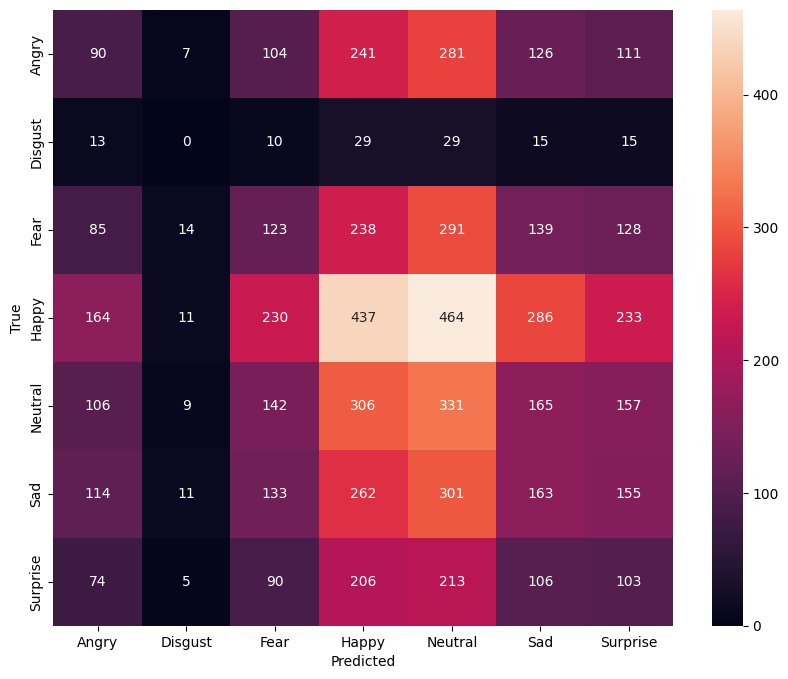

In [43]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get true labels and predictions
true_labels = validation_generator.classes
pred_labels = np.argmax(model.predict(validation_generator), axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

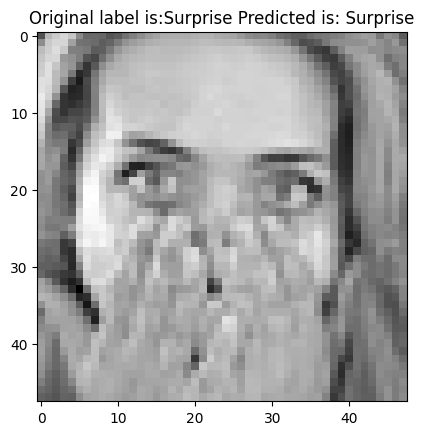

In [44]:
import random
# class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()